In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### 1.
Cargando los datos.

In [2]:
data = np.loadtxt("http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt", comments="%")

In [3]:
df = pd.DataFrame(data)

### 2.
Cambiando los nombres de las columnas.

In [4]:
df.columns = ["Year","Month","MonthlyA","MonthlyUnc","AnnuealA","AnnuealUnc","FiveA","FiveUnc","TenA","TenUnc","TwentyA","TwentyUnc"]

In [5]:
df.head()

Year  Month  MonthlyA  MonthlyUnc  AnnuealA  AnnuealUnc  FiveA  FiveUnc  \
0  1850.0    1.0    -0.766       0.459       NaN         NaN    NaN      NaN   
1  1850.0    2.0    -0.227       0.501       NaN         NaN    NaN      NaN   
2  1850.0    3.0    -0.392       0.390       NaN         NaN    NaN      NaN   
3  1850.0    4.0    -0.616       0.301       NaN         NaN    NaN      NaN   
4  1850.0    5.0    -0.643       0.259       NaN         NaN    NaN      NaN   

   TenA  TenUnc  TwentyA  TwentyUnc  
0   NaN     NaN      NaN        NaN  
1   NaN     NaN      NaN        NaN  
2   NaN     NaN      NaN        NaN  
3   NaN     NaN      NaN        NaN  
4   NaN     NaN      NaN        NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 12 columns):
Year          4140 non-null float64
Month         4140 non-null float64
MonthlyA      4140 non-null float64
MonthlyUnc    4140 non-null float64
AnnuealA      4118 non-null float64
AnnuealUnc    4118 non-null float64
FiveA         4022 non-null float64
FiveUnc       4022 non-null float64
TenA          3902 non-null float64
TenUnc        3902 non-null float64
TwentyA       3662 non-null float64
TwentyUnc     3662 non-null float64
dtypes: float64(12)
memory usage: 388.2 KB


### 3.
La columna con información `Date` es creada al fusionar las columnas `Year` y `Month`.

In [7]:
date = []
for i in range(len(df.Year)):
    date.append(str(int(df.Year[i]))+str(int(df.Month[i])))

In [8]:
df['Date'] = date

In [9]:
df.head()

Year  Month  MonthlyA  MonthlyUnc  AnnuealA  AnnuealUnc  FiveA  FiveUnc  \
0  1850.0    1.0    -0.766       0.459       NaN         NaN    NaN      NaN   
1  1850.0    2.0    -0.227       0.501       NaN         NaN    NaN      NaN   
2  1850.0    3.0    -0.392       0.390       NaN         NaN    NaN      NaN   
3  1850.0    4.0    -0.616       0.301       NaN         NaN    NaN      NaN   
4  1850.0    5.0    -0.643       0.259       NaN         NaN    NaN      NaN   

   TenA  TenUnc  TwentyA  TwentyUnc   Date  
0   NaN     NaN      NaN        NaN  18501  
1   NaN     NaN      NaN        NaN  18502  
2   NaN     NaN      NaN        NaN  18503  
3   NaN     NaN      NaN        NaN  18504  
4   NaN     NaN      NaN        NaN  18505

### 4.
Al contenido de esta columna se le da el formato de una fecha usando `to_datetime`

In [10]:
df["Date"] = pd.to_datetime(df["Date"],format='%Y%m')

In [11]:
df.head()

Year  Month  MonthlyA  MonthlyUnc  AnnuealA  AnnuealUnc  FiveA  FiveUnc  \
0  1850.0    1.0    -0.766       0.459       NaN         NaN    NaN      NaN   
1  1850.0    2.0    -0.227       0.501       NaN         NaN    NaN      NaN   
2  1850.0    3.0    -0.392       0.390       NaN         NaN    NaN      NaN   
3  1850.0    4.0    -0.616       0.301       NaN         NaN    NaN      NaN   
4  1850.0    5.0    -0.643       0.259       NaN         NaN    NaN      NaN   

   TenA  TenUnc  TwentyA  TwentyUnc       Date  
0   NaN     NaN      NaN        NaN 1850-01-01  
1   NaN     NaN      NaN        NaN 1850-02-01  
2   NaN     NaN      NaN        NaN 1850-03-01  
3   NaN     NaN      NaN        NaN 1850-04-01  
4   NaN     NaN      NaN        NaN 1850-05-01

### 5.
Al tratar con datos relacionados con periodos de tiempo, se pueden hacer agrupaciones de los mismos en intervalos diarios, quincenales, semanales, mensuales, etc.

In [13]:
T_serie_2M = df.groupby(pd.Grouper(key='Date', freq='2M')).mean()
T_serie_2M.head()

Year  Month  MonthlyA  MonthlyUnc  AnnuealA  AnnuealUnc  FiveA  \
Date                                                                           
1850-01-31  1850.0    1.0  -0.74550     0.43250       NaN         NaN    NaN   
1850-03-31  1850.0    2.5  -0.31425     0.42975       NaN         NaN    NaN   
1850-05-31  1850.0    4.5  -0.60625     0.25950       NaN         NaN    NaN   
1850-07-31  1850.0    6.5  -0.28825     0.25800    -0.425     0.18225    NaN   
1850-09-30  1850.0    8.5  -0.29650     0.23875    -0.425     0.17000    NaN   

            FiveUnc  TenA  TenUnc  TwentyA  TwentyUnc  
Date                                                   
1850-01-31      NaN   NaN     NaN      NaN        NaN  
1850-03-31      NaN   NaN     NaN      NaN        NaN  
1850-05-31      NaN   NaN     NaN      NaN        NaN  
1850-07-31      NaN   NaN     NaN      NaN        NaN  
1850-09-30      NaN   NaN     NaN      NaN        NaN

In [14]:
T_serie_3M = df.groupby(pd.Grouper(key='Date', freq='3M')).mean()
T_serie_Y = df.groupby(pd.Grouper(key='Date', freq='Y')).mean()
T_serie_H = df.groupby(pd.Grouper(key='Date', freq='H')).mean()

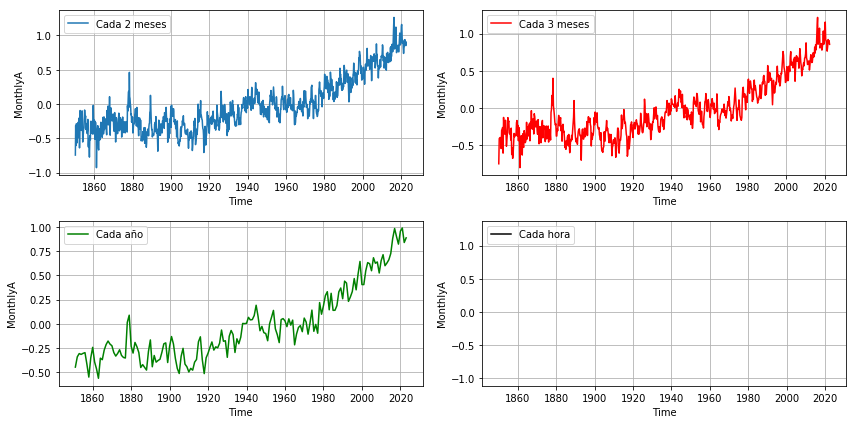

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))

ax[0,0].plot(T_serie_2M.index, T_serie_2M.MonthlyA, label='Cada 2 meses')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('MonthlyA')
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(T_serie_3M.index, T_serie_3M.MonthlyA, label='Cada 3 meses', color='r')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('MonthlyA')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].plot(T_serie_Y.index, T_serie_Y.MonthlyA, label='Cada año', color='g')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('MonthlyA')
ax[1,0].grid()
ax[1,0].legend()

ax[1,1].plot(T_serie_H.index, T_serie_H.MonthlyA, label='Cada hora', color='k')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('MonthlyA')
ax[1,1].grid()
ax[1,1].legend()

fig.tight_layout()

* A partir de todas las gráficas se observa una tendencia *general* clara del **aumento de la temperatura**, que incluso podría ajustarse a un aumento de **ritmo exponencial**.
* Para intervalos de tiempo muy pequeños, como dos o tres meses, se notan fuertes fluctuaciones en los valores; que son de esperar pues se trata de un proceso que implica la dinámica caótica del tiempo atmosférico; estas fuertes fluctuaciones pueden hacer difícil la tarea de predecir este cambio en la temperatura en ventanas de tiempo muy limitadas (días, semanas o meses). MIentras que para ventanas amplias, las variaciones dejan ver la tendendia global de la variable.